# Refer to the questionnaire

In [36]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sbn
from scipy.stats import f_oneway, kruskal
from scipy import stats

In [2]:
#Import dataset as a dataframe called SectionA
SectionA=pd.read_csv("Question 1.csv")
#view dataframe
SectionA

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
0,ABS,Alcohol Beverage Services,ABS 85 Administration,M,175873.0000,0.00,0.00,M2
1,ABS,Alcohol Beverage Services,ABS 85 Administration,M,145613.3600,0.00,0.00,M3
2,ABS,Alcohol Beverage Services,ABS 85 Administration,F,136970.0000,0.00,0.00,M3
3,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,89432.6940,0.00,2490.00,21
4,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,78947.0000,456.68,6257.70,16
...,...,...,...,...,...,...,...,...
10286,TBS,Department of Technology and Enterprise Busine...,TBS 34 OSP Low Code Governance and Administration,M,134500.0000,0.00,0.00,N28
10287,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Director,F,215032.1000,0.00,0.00,NaN
10288,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Office of Zoning and Administrative Hea...,F,84365.5529,0.00,0.00,N18
10289,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Zoning and Administrative Hearings,F,98228.0000,0.00,1596.27,N21


# 1. Using suitable visuals, run a “Gender Pay Gap Analysis” 

**A. Check dataframe for anomalies**

In [4]:
#Check information
SectionA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10291 entries, 0 to 10290
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Department       10291 non-null  object 
 1   Department_Name  10291 non-null  object 
 2   Division         10291 non-null  object 
 3   Gender           10291 non-null  object 
 4   Base_Salary      10291 non-null  float64
 5   Overtime_Pay     10291 non-null  float64
 6   Longevity_Pay    10291 non-null  float64
 7   Grade            10258 non-null  object 
dtypes: float64(3), object(5)
memory usage: 643.3+ KB


In [3]:
#check for missing data
SectionA.isnull().sum()

Department          0
Department_Name     0
Division            0
Gender              0
Base_Salary         0
Overtime_Pay        0
Longevity_Pay       0
Grade              33
dtype: int64

In [5]:
#Check for duplicates
SectionA.duplicated().sum()

617

In [9]:
#Check for outliers
#Generate a function to count outliers
def count_outliers(SectionA, column_name):

  Q1 = cont_data[column_name].quantile(0.25)
  Q3 = cont_data[column_name].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 2.0 * IQR
  upper_bound = Q3 + 2.0 * IQR
  outliers = cont_data[(cont_data[column_name] < lower_bound) | (cont_data[column_name] > upper_bound)]
  return len(outliers)

# Count outliers in each variable
salary_outliers = count_outliers(cont_data, 'Base_Salary')
overtime_outliers = count_outliers(cont_data, 'Overtime_Pay')
longevity_outliers = count_outliers(cont_data, 'Longevity_Pay')

print("Number of Base salary outliers:", salary_outliers)
print("Number of Overtime Pay outliers:", overtime_outliers)
print("Number of Longevity Pay outliers:", longevity_outliers)

# Calculate the total number of outliers across all four columns
total_outliers = salary_outliers + overtime_outliers + longevity_outliers
print("Total number of outliers:", total_outliers)

#Calculate % of total outliers
percentage_outliers = (total_outliers/len(SectionA))*100
print("The percentage of total outliers:", percentage_outliers)

Number of Base salary outliers: 107
Number of Overtime Pay outliers: 954
Number of Longevity Pay outliers: 1765
Total number of outliers: 2826
The percentage of total outliers: 27.46088815469828


In [7]:
#Check for outliers
##Subset quantitative and qualitative variables
cont_data = SectionA.select_dtypes(include=['int64', 'float64'])
cat_data = SectionA.select_dtypes(include = "object")
print("continuous variables:", cont_data.columns)
print("categorical variables:", cat_data.columns)

continuous variables: Index(['Base_Salary', 'Overtime_Pay', 'Longevity_Pay'], dtype='object')
categorical variables: Index(['Department', 'Department_Name', 'Division', 'Gender', 'Grade'], dtype='object')


- The dataframe has 33 missing samples in the categorical variable Grade. These can be deleted or replaced with mode
- The dataframe has 617 duplicates. These can be deleted.
- The dataframe has 27.5% of the samples in the three continuous variables as outliers. These outliers could be interesting pieces of information, so we will transform a dataframe exclusing the outliers, and one including the outliers to see what differences it makes in the descriptive analytics

**B. Transform dataframe**

In [10]:
#Deleting duplicates
SectionA_clean1=SectionA.drop_duplicates()
#Check for duplicates
SectionA_clean1.duplicated().sum()

0

In [11]:
#Imputing for missing data using mode
SectionA_clean1['Grade']=SectionA_clean1['Grade'].fillna(SectionA_clean1['Grade'].mode()[0])
#Check the result for missing data
SectionA_clean1.isna().sum()


/var/folders/fz/73x0k3yj55b9_g8mt4krpwr80000gn/T/ipykernel_5621/3238173104.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SectionA_clean1['Grade']=SectionA_clean1['Grade'].fillna(SectionA_clean1['Grade'].mode()[0])


Department         0
Department_Name    0
Division           0
Gender             0
Base_Salary        0
Overtime_Pay       0
Longevity_Pay      0
Grade              0
dtype: int64

**C. Gender Pay Analysis Using a Total Salary**

In [15]:
# Create a new variable that combines all the salaries
SectionA_clean1['Total_Salary'] = SectionA_clean1['Base_Salary'] + SectionA_clean1['Overtime_Pay'] + SectionA_clean1['Longevity_Pay']
#Another variable that shows the average salary
SectionA_clean1['Average_Salary'] = SectionA_clean1['Total_Salary']/3

# Display the first few rows to verify the new feature
# print(data[['Base_Salary', 'Overtime_Pay', 'Longevity_Pay', 'Total_Salary']].head())
SectionA_clean1.head()

/var/folders/fz/73x0k3yj55b9_g8mt4krpwr80000gn/T/ipykernel_5621/637826162.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SectionA_clean1['Total_Salary'] = SectionA_clean1['Base_Salary'] + SectionA_clean1['Overtime_Pay'] + SectionA_clean1['Longevity_Pay']
/var/folders/fz/73x0k3yj55b9_g8mt4krpwr80000gn/T/ipykernel_5621/637826162.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SectionA_clean1['Average_Salary'] = SectionA_clean1['Total_Salary']/3


,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade,Total_Salary,Average,Average_Salary
0,ABS,Alcohol Beverage Services,ABS 85 Administration,M,175873.000,0.00,0.0,M2,175873.000,100892.864258,58624.333333
1,ABS,Alcohol Beverage Services,ABS 85 Administration,M,145613.360,0.00,0.0,M3,145613.360,100892.864258,48537.786667
2,ABS,Alcohol Beverage Services,ABS 85 Administration,F,136970.000,0.00,0.0,M3,136970.000,100892.864258,45656.666667
3,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,89432.694,0.00,2490.0,21,91922.694,100892.864258,30640.898000
4,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,78947.000,456.68,6257.7,16,85661.380,100892.864258,28553.793333


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_su

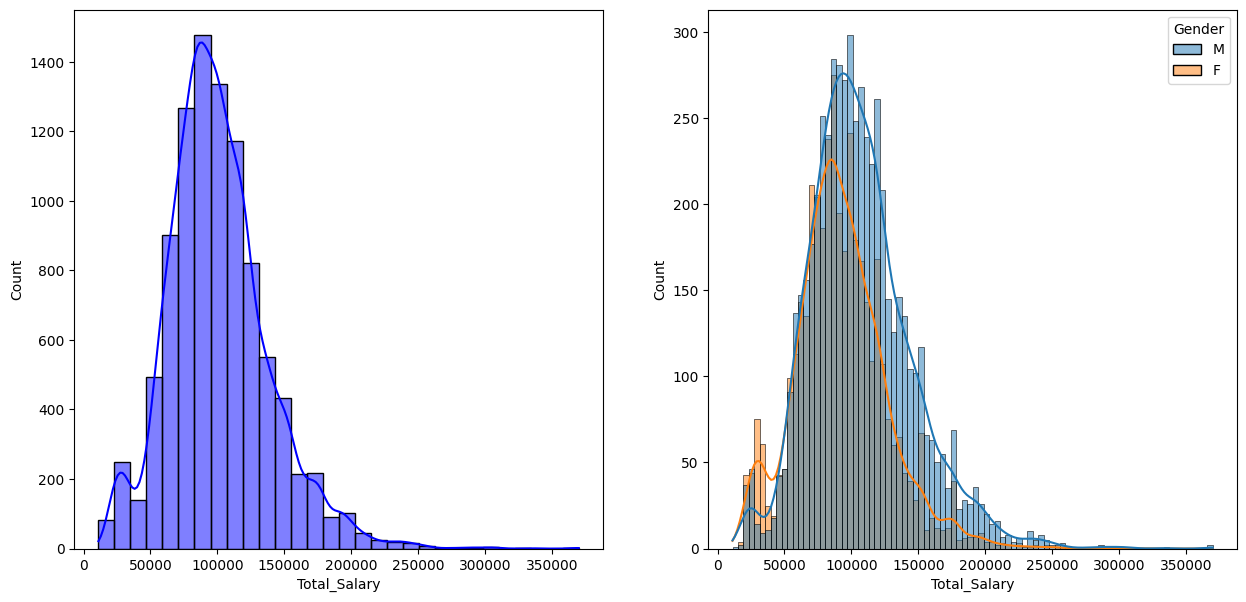

In [18]:
#Plot of total salary for both genders
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=SectionA_clean1, x='Total_Salary', bins=30, kde=True, color='b')
plt.subplot(122)
sns.histplot(data=SectionA_clean1, x='Total_Salary', kde=True, hue='Gender')
plt.show()

**D. Gender pay analysis by department**

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framew

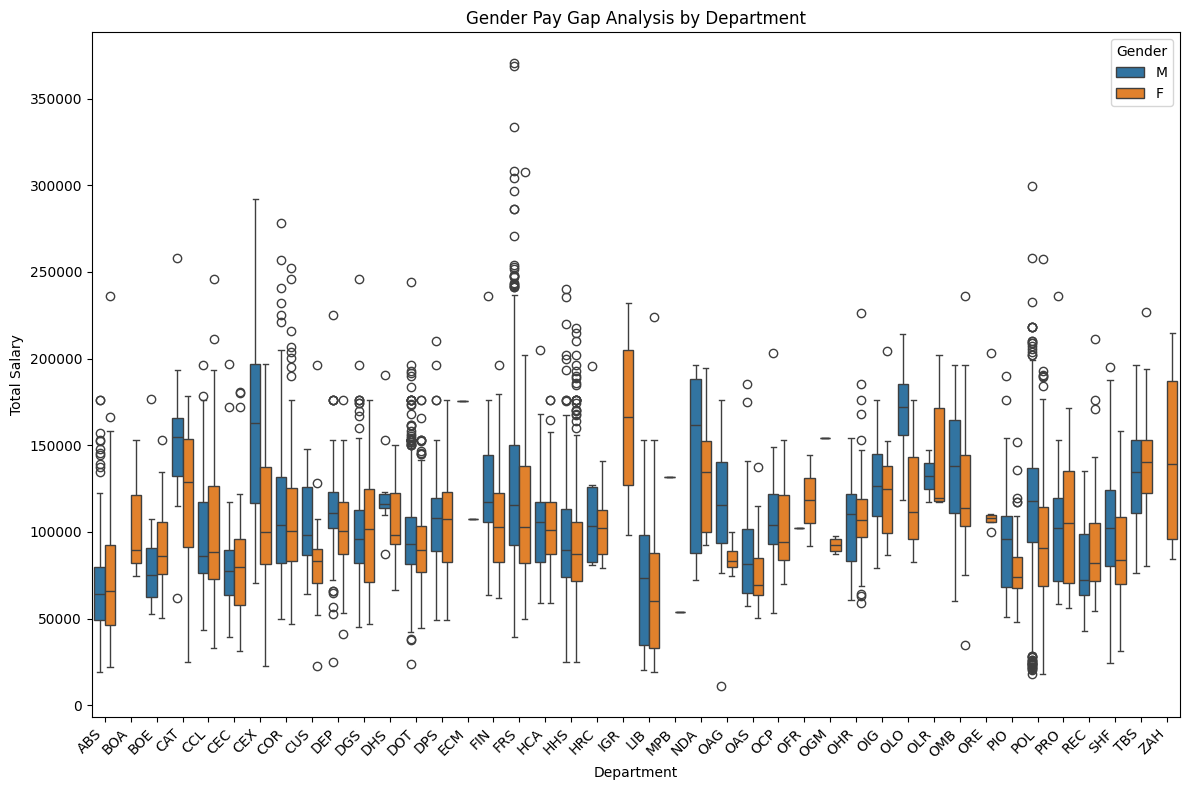

In [19]:
# Create the box plot
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.boxplot(x='Department', y='Total_Salary', hue='Gender', data=SectionA_clean1)

# Customize plot
plt.title('Gender Pay Gap Analysis by Department')
plt.xlabel('Department')
plt.ylabel('Total Salary')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Gender')
# Create separate box plots for each department
departments = SectionA_clean1['Department'].unique()

# Show plot
plt.tight_layout()
plt.show()

**E. Gender pay analysis by grade**

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framew

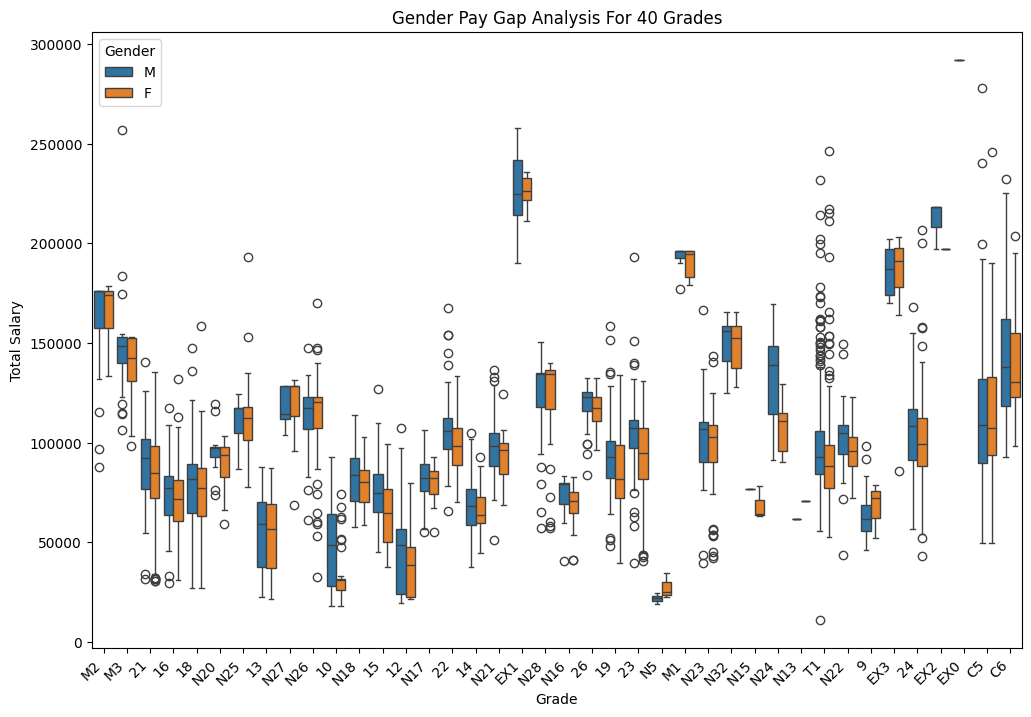

In [22]:
# Select 40 unique grades
selected_grades = SectionA_clean1['Grade'].unique()[:40]

# Filter the data to include only the selected grades
filtered_data = SectionA_clean1[SectionA_clean1['Grade'].isin(selected_grades)]

# Create the box plot
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.boxplot(x='Grade', y='Total_Salary', hue='Gender', data=filtered_data)

# Customize plot
plt.title('Gender Pay Gap Analysis For 40 Grades')
plt.xlabel('Grade')
plt.ylabel('Total Salary')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Gender')

**F. Gender pay analysis across Divisions**

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framew

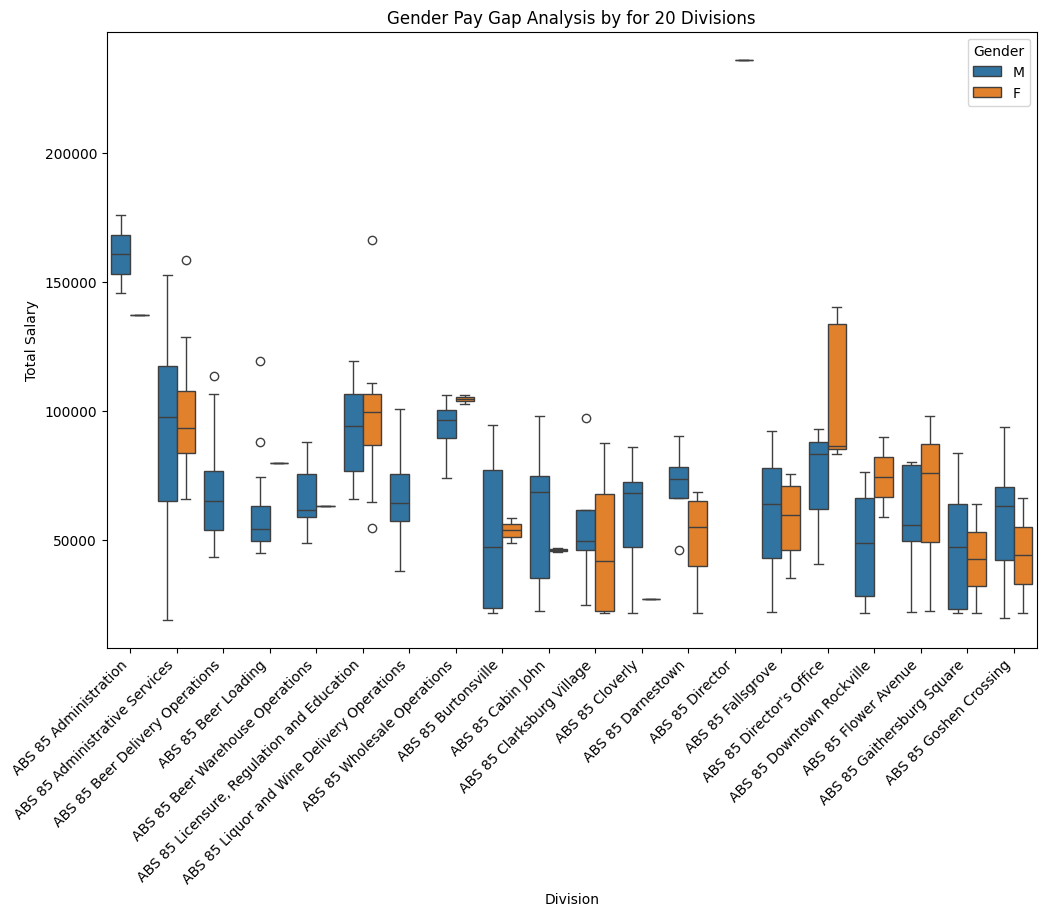

In [24]:
# Select 20 unique Divisions
selected_divisions = SectionA_clean1['Division'].unique()[:20]

# Filter the data to include only the selected grades
filtered_data = SectionA_clean1[SectionA_clean1['Division'].isin(selected_divisions)]

# Create the box plot
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.boxplot(x='Division', y='Total_Salary', hue='Gender', data=filtered_data)

# Customize plot
plt.title('Gender Pay Gap Analysis by for 20 Divisions')
plt.xlabel('Division')
plt.ylabel('Total Salary')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Gender')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framew

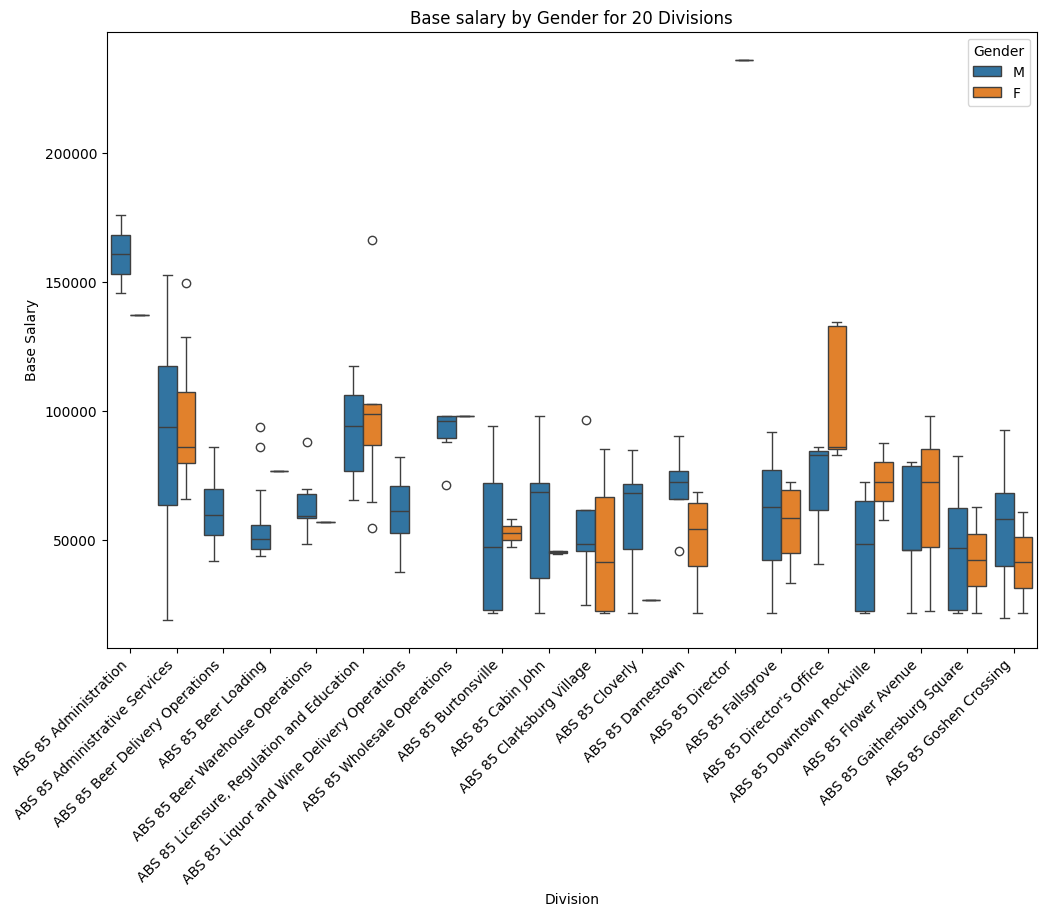

In [25]:
#Alternatively look at each salary type e.g. Base_Salary
# Create the box plot for 20 divisions
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.boxplot(x='Division', y='Base_Salary', hue='Gender', data=filtered_data)
# Customize plot
plt.title('Base salary by Gender for 20 Divisions')
plt.xlabel('Division')
plt.ylabel('Base Salary')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Gender')

      Results Explained:
- Overall, females receive a lower total salary than males. The total salary is a combination of the base, overtime and longevity pay.
- Across 40 grades within the working industry, females recieve a lower total salary than males with the exceptions of gradescN26, N5, N15, 9, EX3; where females get a higher total salary.
- Across a sampled 20 divisions in the working industry, the majority of the 20 divisions pay males a higher total salary than females. There are some divisions where the females get a negligible total salary compared to males such as ABD 85 Adminstration, Beer Delivery Operations, Beer Loading, Beer Warehouse Operations, indicating that either females are not employed in those divisions, or they are too few and underpaid.
- The pay gap across the departments depicts a similar overall picture; females recieve a lower total salary than males

# 2. Analyse the distribution of salaries across different ‘Departments’ and ‘Divisions’ 

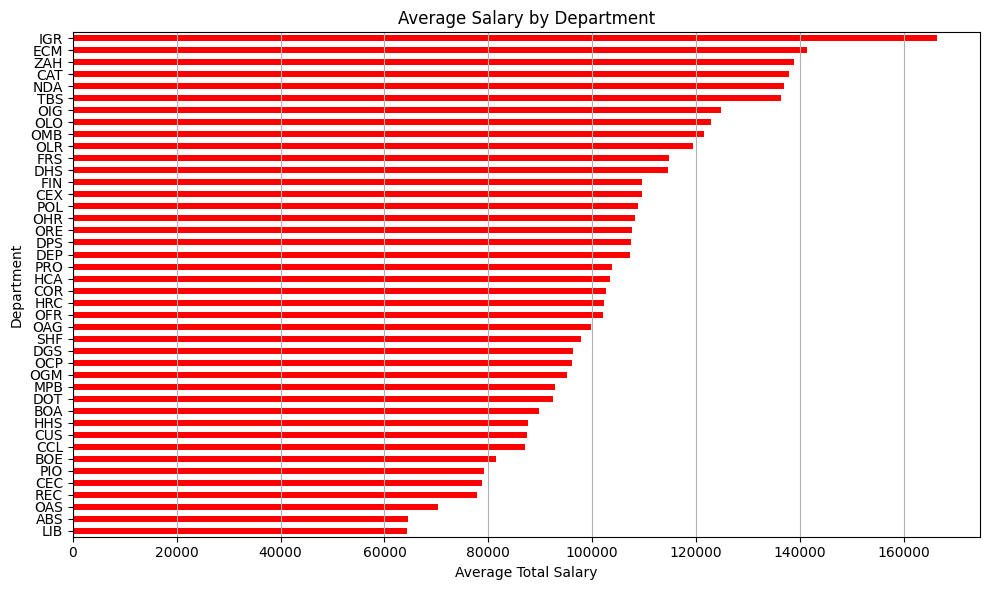

In [26]:
# Calculate the average total salary by department.
avg_salary_by_department = SectionA_clean1.groupby('Department')['Total_Salary'].median().sort_values()

# Plot a a bar chart to show the different departments based on the average pay.
plt.figure(figsize=(10, 6))
avg_salary_by_department.plot(kind='barh', color='red')
plt.title('Average Salary by Department')
plt.xlabel('Average Total Salary')
plt.ylabel('Department')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

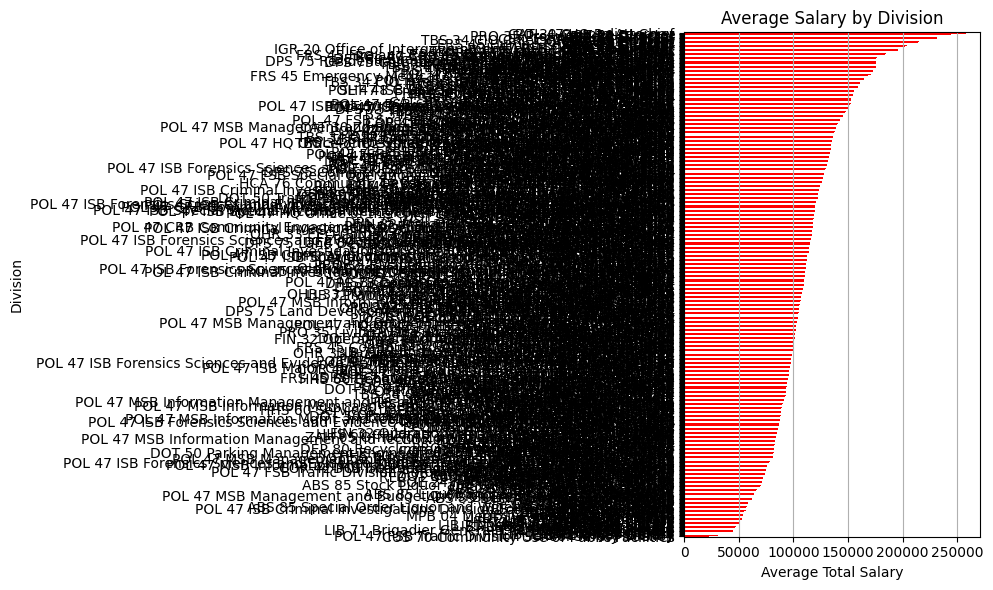

In [28]:
# Calculate the average total salary by division.
avg_salary_by_division = SectionA_clean1.groupby('Division')['Total_Salary'].median().sort_values()

# Plot a bar chart to show the different departments based on the average pay.
plt.figure(figsize=(10, 6))
avg_salary_by_division.plot(kind='barh', color='red')
plt.title('Average Salary by Division')
plt.xlabel('Average Total Salary')
plt.ylabel('Division')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

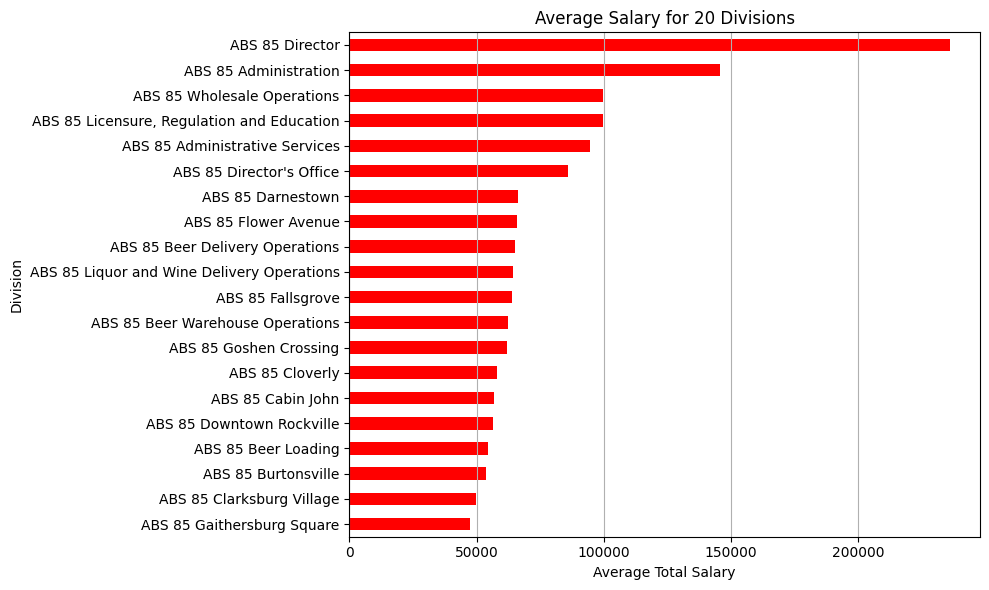

In [30]:
#The above visual is tough to see, let's sample the data
# Select 20 unique Divisions
selected_divisions = SectionA_clean1['Division'].unique()[:20]

# Filter the data to include only the selected grades
filtered_data2 = SectionA_clean1[SectionA_clean1['Division'].isin(selected_divisions)]
# Calculate the average total salary by division.
avg_salary_by_division = filtered_data.groupby('Division')['Total_Salary'].median().sort_values()

# Plot a bar chart to show the different departments based on the average pay.
plt.figure(figsize=(10, 6))
avg_salary_by_division.plot(kind='barh', color='red')
plt.title('Average Salary for 20 Divisions')
plt.xlabel('Average Total Salary')
plt.ylabel('Division')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

         Result Explanation:
- There's definitely a pay disparity in the different departments and divisions
- For instance, across all the departments, the "IGR" department gets the highest total salary >160,000, whereas "LIB" gets the lowest at a little over 60,000.
- A similar scenario is seen for 20 sampled divisions, "ABS 85 Director" receives the highest total salary. 

# 3. Identify the impact of ‘Overtime’ and ‘Longevity Pay’ on the overall compensation of employees

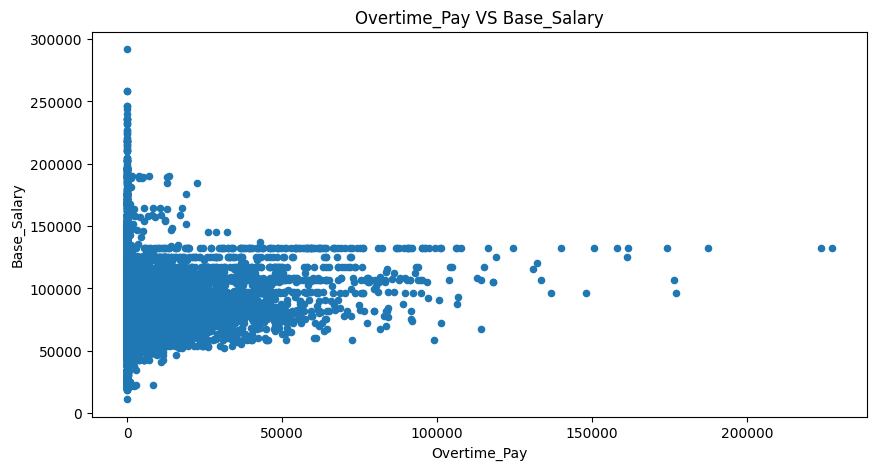

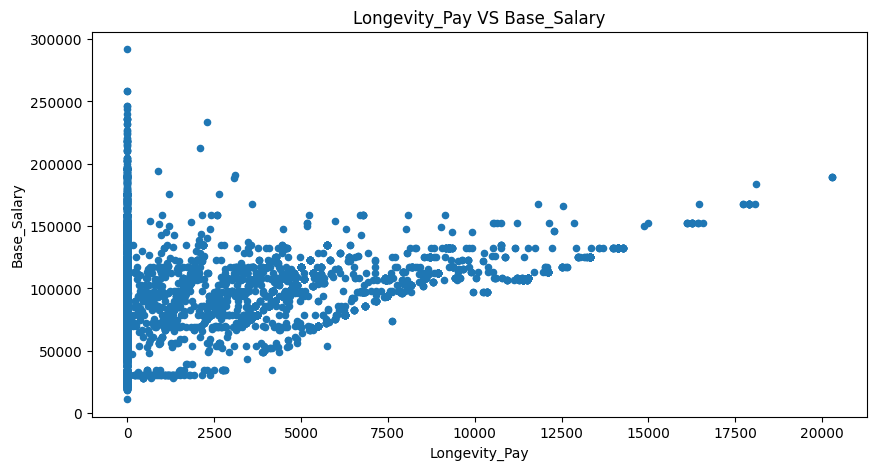

In [31]:
#Visual relationships between Base_Salary and other two variables
ContinuousCols = ['Overtime_Pay', 'Longevity_Pay']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    SectionA_clean1.plot.scatter(x=predictor, y='Base_Salary', figsize=(10,5), title=predictor+" VS "+ 'Base_Salary')

- Based on the scatterplots, as overtime_pay increases, Base_Salary remains the same
- As Longevity_Pay increases, so does the Base_Salary, albeit slightly
- Let's investigate this statistically

# 3. Identify the impact of ‘Overtime’ and ‘Longevity Pay’ on the overall compensation of employees (i.e. ‘Base_Salary’) and explain the trends or patterns in these payments. [10 Marks]

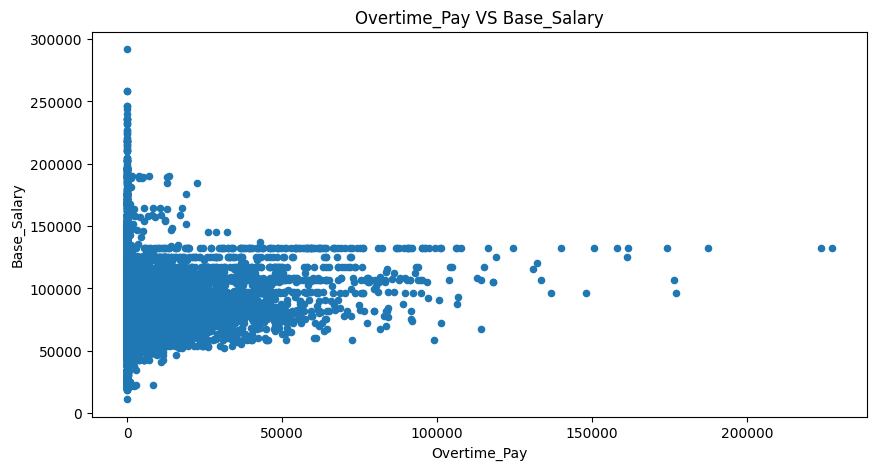

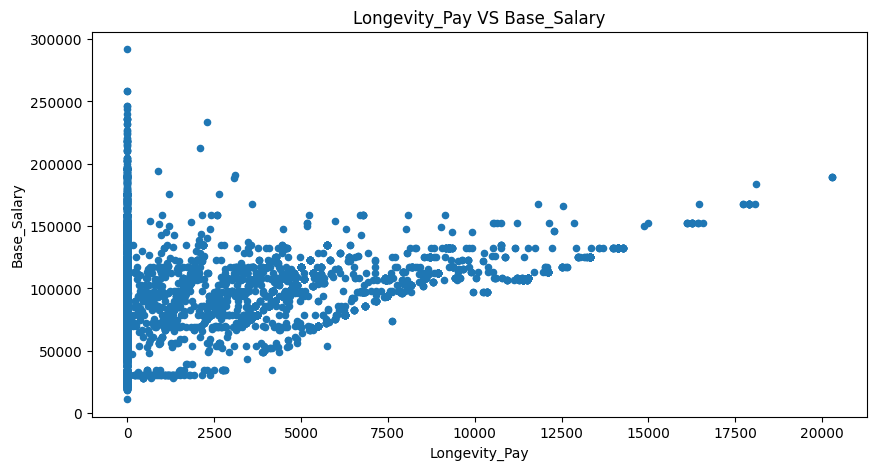

In [ ]:
#Visual relationships between Base_Salary and other two variables
ContinuousCols = ['Overtime_Pay', 'Longevity_Pay']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    SectionA_clean1.plot.scatter(x=predictor, y='Base_Salary', figsize=(10,5), title=predictor+" VS "+ 'Base_Salary')

- Based on the scatterplots, as overtime_pay increases, Base_Salary remains the same
- As Longevity_Pay increases, so does the Base_Salary, albeit slightly
- Let's investigate this statistically

<Axes: >

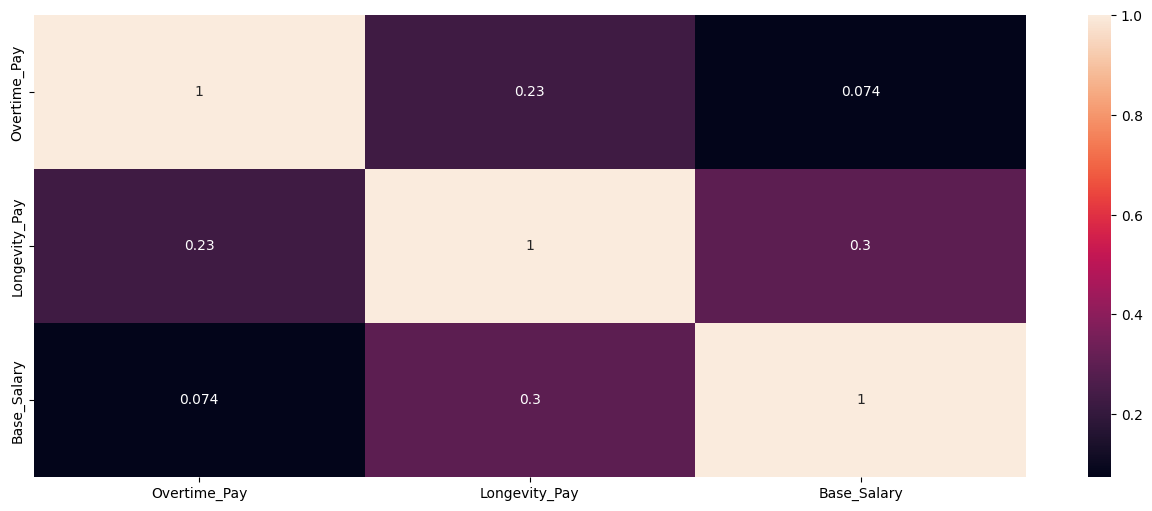

In [ ]:
# Calculate the correlation matrix for the continuous columns
corr_matrix = SectionA_clean1[['Overtime_Pay', 'Longevity_Pay', 'Base_Salary']].corr()

# Plot the heatmap
plt.figure(figsize=(16,6))
sns.heatmap(corr_matrix, annot=True)

           Results Explained:
- Overtime_Pay has a very low but positive impact on Base_Salary (r=0.074), i.e. as big Overtime_Pay increases, lead to low Base_Salary increases 
- Longevity_Pay has a moderate linear relationship with Base_Salary (r=0.3) meaning moderate increases in Longevity_Pay will lead to increases in Base_Salary.

# Predictive Analytics 


In [ ]:
#Import testing and training datasets
train=pd.read_csv("Question 2_train.csv")
test=pd.read_csv("Question 2_test.csv")
print(train.shape)

(90615, 10)


# 1. Generate a data mining model suitable for predicting the age of Abalone species.

**A. Check dataframe for missing data**

In [ ]:
train.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64

**B. Transform training  data for Machine Learning**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder for the variable Sex
le = LabelEncoder()

# Fit and transform the 'Sex' column in both training and testing datasets
train['Sex'] = le.fit_transform(train['Sex'])
test['Sex'] = le.fit_transform(test['Sex'])
train.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,0,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,1,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,2,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,1,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [ ]:
#Subset variables in to categorical and continuous
categorical_vars = train.select_dtypes(include=['object']).columns.tolist()
continuous_vars = train.select_dtypes(include=['float64', 'int64']).columns.tolist()

print("Categorical Variables:", categorical_vars)
print("Continuous Variables:", continuous_vars)

Categorical Variables: []
Continuous Variables: ['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight', 'Rings']


**C. Relationships between predictor and target variable (Rings)**

In [ ]:
#Use ANOVA
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [ ]:
#Calling the function to check which continuous variables are correlated with target
ContinuousVariables=['Rings']
FunctionAnova(inpData=train, TargetVariable='Sex', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

Rings is correlated with Sex | P-Value: 0.0


['Rings']

In [ ]:
# Relationship between continuous variables and target Rings
correlation_matrix = train[continuous_vars].corr()

# Display the correlation matrix
correlation_matrix

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
id,1.000000,-0.003553,0.004724,0.004290,0.005916,0.005228,0.004203,0.004878,0.005887,0.000938
Sex,-0.003553,1.000000,-0.020774,-0.021648,-0.029732,-0.027787,-0.017512,-0.032769,-0.033301,-0.026308
Length,0.004724,-0.020774,1.000000,0.989732,0.916094,0.931449,0.909609,0.913134,0.911073,0.623786
Diameter,0.004290,-0.021648,0.989732,1.000000,0.919618,0.933848,0.908466,0.914668,0.917871,0.636832
Height,0.005916,-0.029732,0.916094,0.919618,1.000000,0.902344,0.861769,0.886132,0.904019,0.665772
Whole weight,0.005228,-0.027787,0.931449,0.933848,0.902344,1.000000,0.971249,0.974319,0.964201,0.617274
Whole weight.1,0.004203,-0.017512,0.909609,0.908466,0.861769,0.971249,1.000000,0.949227,0.911800,0.515067
Whole weight.2,0.004878,-0.032769,0.913134,0.914668,0.886132,0.974319,0.949227,1.000000,0.937069,0.588954
Shell weight,0.005887,-0.033301,0.911073,0.917871,0.904019,0.964201,0.911800,0.937069,1.000000,0.694766
Rings,0.000938,-0.026308,0.623786,0.636832,0.665772,0.617274,0.515067,0.588954,0.694766,1.000000


**D. Feature selection for ML**

In [ ]:
SelectedColumns= ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Whole weight.1', 'Whole weight.2', 'Shell weight']

# Selecting final columns
DataForML=train[SelectedColumns]
DataForML.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400
1,0,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200
2,1,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050
3,2,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500
4,1,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975


In [ ]:
#Use one-hot encoding
DataForML_Numeric=pd.get_dummies(DataForML)
DataForML_Numeric

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400
1,0,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200
2,1,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050
3,2,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500
4,1,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975
...,...,...,...,...,...,...,...,...
90610,2,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450
90611,2,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400
90612,1,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815
90613,1,0.345,0.270,0.075,0.2000,0.0980,0.0490,0.0700


In [ ]:
# Add Target Variable Rings to the data
DataForML_Numeric['Rings']=train['Rings']

# Printing sample rows
DataForML_Numeric.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,0,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,1,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,2,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,1,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


**E. Split data for training and testing the model**

In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable='Rings'
Predictors=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Whole weight.1', 'Whole weight.2', 'Shell weight']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

In [ ]:
#Split the data into training and testing set
#Training the model on 80% of the data and testing it on 20% of the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=428)

**F. Fit the models to the data**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error # these are the metrics to evaluate the regression models
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor 
from sklearn.svm import SVR 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge

In [ ]:
svr_model = SVR()
forest_model = RandomForestRegressor()
tree_model= DecisionTreeRegressor()
lr_model_ridge = LinearRegression()

In [ ]:
#Fit data to Random Forest Regressor model
forest_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
#Fit Decision tree model to data
tree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
#Fit the Linear Regressor to the data
lr_model_ridge.fit(X_train, y_train)

LinearRegression()

**G. Test accuracy of models**

In [ ]:
#Accuracy of Random Forest
y_pred_rf=forest_model.predict(X_test)
scor = r2_score(y_test, y_pred_rf)
err = mean_squared_error(y_test, y_pred_rf)
print(f"R2_score : {scor}")
print(f"Mean Square Error : {err}")

R2_score : 0.6557478711759317
Mean Square Error : 3.4256136953043095


In [ ]:
#Accuracy of Decision Tree
y_pred_dt=tree_model.predict(X_test)
scor1 = r2_score(y_test, y_pred_dt)
err1 = mean_squared_error(y_test, y_pred_dt)
print(f"R2_score : {scor1}")
print(f"Mean Square Error : {err1}")

R2_score : 0.3112838868586897
Mean Square Error : 6.853335540473432


In [ ]:
#Accuracy of the Linear Regressor
y_pred_lr=lr_model_ridge.predict(X_test)
scor2 = r2_score(y_test, y_pred_lr)
err2 = mean_squared_error(y_test, y_pred_lr)
print(f"R2_score : {scor2}")
print(f"Mean Square Error : {err2}")

R2_score : 0.6037896743397455
Mean Square Error : 3.9426437897102584


**H. Save model and use to make predictions**
- Selected the Random Forest Regressor

In [ ]:
import joblib
# Save the best model to a file
joblib.dump(forest_model, 'age_predictor.pkl')

['age_predictor.pkl']

In [ ]:
# Load the savedmodel
with open('age_predictor.pkl', 'rb') as file:
    loaded_model = joblib.load(file)

In [ ]:
#Transform the test dataframe (recall, it was alread label encoded)
data_test = test.drop(columns=['id'])
data_test

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,2,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,2,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,2,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,2,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,1,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050
...,...,...,...,...,...,...,...,...
60406,1,0.345,0.260,0.085,0.1775,0.0735,0.0265,0.0500
60407,0,0.525,0.410,0.145,0.8445,0.3885,0.1670,0.2050
60408,1,0.590,0.440,0.155,1.1220,0.3930,0.2000,0.2650
60409,0,0.660,0.525,0.190,1.4935,0.5885,0.3575,0.4350


In [ ]:
#Make predictions
predictions = loaded_model.predict(data_test)

# Output 1: The 'predictions' variable (typically a NumPy array or a pandas Series)
print("Predictions output:")
predictions


# Output 2: The 'data_test' DataFrame after adding the predictions as a column
data_test['predicted_rings'] = predictions

data_test

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Predictions output:


,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,predicted_rings
0,2,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005,10.02
1,2,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750,9.58
2,2,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405,9.87
3,2,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350,11.18
4,1,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050,7.89
...,...,...,...,...,...,...,...,...,...
60406,1,0.345,0.260,0.085,0.1775,0.0735,0.0265,0.0500,6.66
60407,0,0.525,0.410,0.145,0.8445,0.3885,0.1670,0.2050,9.04
60408,1,0.590,0.440,0.155,1.1220,0.3930,0.2000,0.2650,12.07
60409,0,0.660,0.525,0.190,1.4935,0.5885,0.3575,0.4350,12.38


In [ ]:
#According to aquatics,the ageing of an abalone is done by adding 1.5 to the number of rings
#GEnerate a new column showing the predicted age of abalone
data_test['Age'] =  data_test['predicted_rings']+1.5
data_test.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,predicted_rings,Age
0,2,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005,10.02,11.52
1,2,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750,9.58,11.08
2,2,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405,9.87,11.37
3,2,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350,11.18,12.68
4,1,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050,7.89,9.39


In [ ]:
#Save results as excel
data_test.to_excel('Abalone_age_prediction.xlsx', index=False)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


# PART C: Natural Language Processing 

In [ ]:
!pip install colorama
import colorama

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Fore, init
import plotly.express as px

import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from tqdm.notebook import tqdm
from collections import Counter
from wordcloud import WordCloud

nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 8]
[nltk_data]     nodename nor servname provided, or not known>
[nltk_data] Error loading punkt: <urlopen error [Errno 8] nodename nor
[nltk_data]     servname provided, or not known>
[nltk_data] Error loading stopwords: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>


In [ ]:
#Import dataset as dataframe called "SectionC"
SectionC=pd.read_excel("Question 3.csv.xlsx")
SectionC

,Articles,labels
0,Musicians to tackle US red tape Musicians gro...,entertainment
1,"U2s desire to be number one U2, who have won ...",entertainment
2,Rocker Doherty in on-stage fight Rock singer ...,entertainment
3,Snicket tops US box office chart The film ada...,entertainment
4,"Oceans Twelve raids box office Oceans Twelve,...",entertainment
...,...,...
2220,Warning over Windows Word files Writing a Mic...,tech
2221,Fast lifts rise into record books Two high-sp...,tech
2222,Nintendo adds media playing to DS Nintendo is...,tech
2223,Fast moving phone viruses appear Security fir...,tech


# 1. Generate visual(s) that would best present the news articles 

**A. Check for missing data**

In [ ]:
SectionC.isnull().sum()

Articles    0
labels      0
dtype: int64

**B. Data Exploration**

In [ ]:
#General information
SectionC.info()
SectionC.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Articles  2225 non-null   object
 1   labels    2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


(2225, 2)

In [ ]:
#See all the labels the articles have been assigned to
SectionC.labels.unique()

array(['entertainment', 'business', 'sport', 'politics', 'tech'],
      dtype=object)

In [ ]:
#See how many articles under each label
SectionC.labels.value_counts()

labels
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64

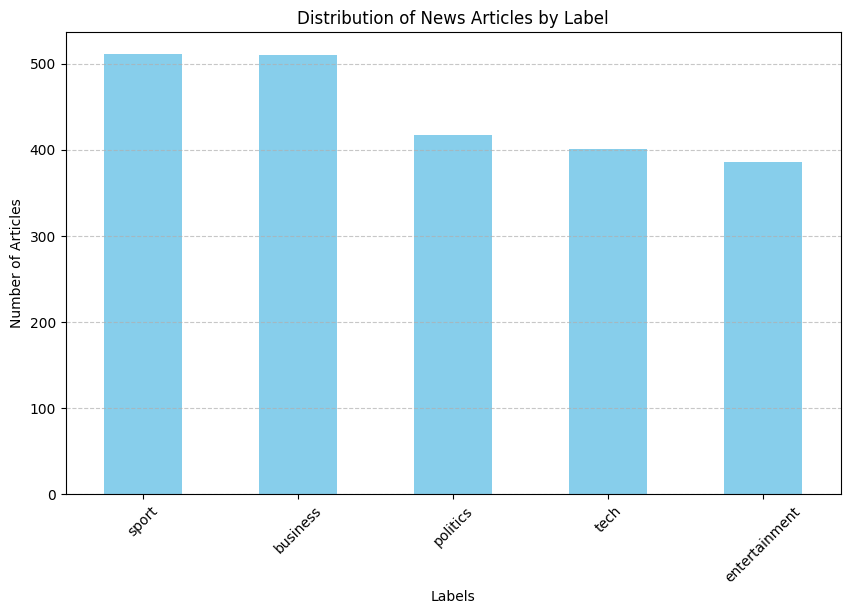

In [ ]:
#Distribution of articles displayed using a barchart
# Fist count the number of articles in each label
label_counts = SectionC['labels'].value_counts()

#Then plot barchart
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of News Articles by Label')
plt.xlabel('Labels')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

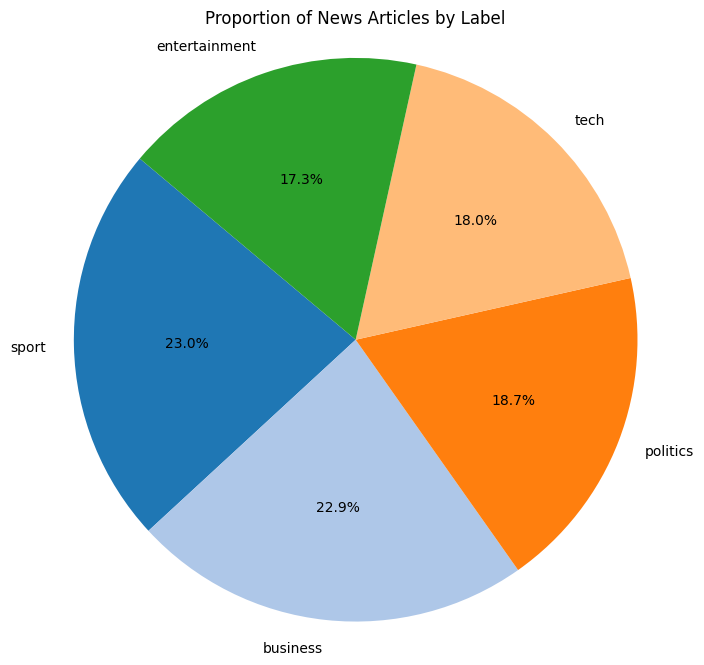

In [ ]:
# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Proportion of News Articles by Label')
plt.axis('equal')
plt.show()

- The dataframe has two variables (Articles and labels) and 2225 rows
- There are 5 unique labels i.e. ['entertainment', 'business', 'sport', 'politics', 'tech'] under which the articles are classified
- The majority of  the articles are classified as sport (511 articles) while the least are entertainment (386 articles). This is displayed in the barchart and pie chart


**C. Transform dataframe**

In [ ]:
#Remove punctuation and turn text in articles to lowercase
SectionC.Articles=SectionC.Articles.str.lower()
for punc in string.punctuation:
    SectionC.Articles=SectionC.Articles.str.replace(punc,"")

**D. Plot Word Cloud**

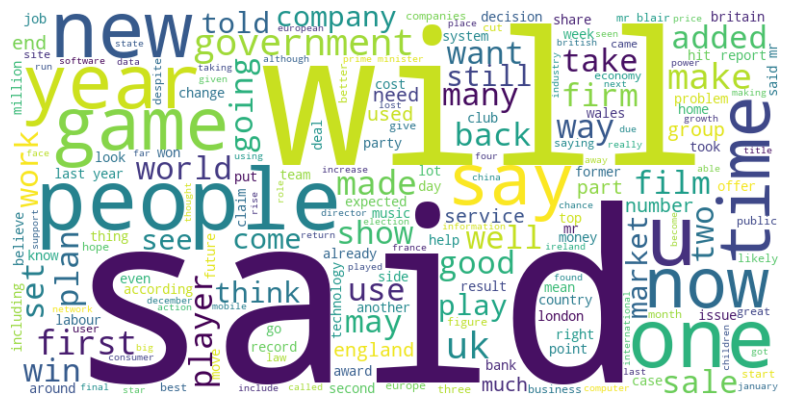

In [ ]:
#Generate a wordcloud of the articles
filtered_text = " ".join(SectionC["Articles"].astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

#Plot the wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
